In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import pickle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TSLA return_asset (3).csv to TSLA return_asset (3) (1).csv


In [ ]:
df = pd.read_csv("TSLA return_asset (3).csv")
df.head()

,Date,TSLA
0,2015-07-02,0.040386
1,2015-07-06,-0.001071
2,2015-07-07,-0.042328
3,2015-07-08,-0.048231
4,2015-07-09,0.011610


## Implement and compare two different types of models

In [ ]:
# Divide the dataset into 90% training and 10% testing sets
train_size=int(len(df)*0.9)
train_data=df.iloc[:train_size]
test_data=df.iloc[train_size:]

## A classical statistical model: SARIMA

In [ ]:
# finding the best parametrs combination using  pmdarima
auto_model=pm.auto_arima(train_data["TSLA"],seasonal=True,m=12,
                         stepwise=True, trace=True,
                         suppress_warnings=True,
                         max_p=5,max_q=5,max_d=2,
                         max_P=2,max_Q=2,max_D=1)
print(auto_model.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-8646.490, Time=16.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-8653.629, Time=0.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-8650.981, Time=3.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-8650.896, Time=3.79 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-8650.336, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-8652.967, Time=0.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-8652.895, Time=1.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-8650.321, Time=2.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-8651.629, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-8651.627, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-8649.629, Time=0.96 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 30.545 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2280
Model:                        SARIMAX   Log Likelihood                4328.815
Date:                Sat, 09 Aug 2025   AIC                          -8653.629
Time:                        09:07:55   BIC                          -8642.165
Sample:                             0   HQIC                         -8649.448
                               - 2280                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.001      2.295      0.022       0.

In [ ]:
# Fit ARIMA model
s_model=SARIMAX(train_data["TSLA"],order=(1,0,0),seasonal_order=(1,0,0,12),enforce_stationarity=False,enforce_invertibility=False)
s_model_fit=s_model.fit()
# Print model summary
print(s_model_fit.summary())

# Forecast and evaluate
s_forecast=s_model_fit.forecast(steps=len(test_data))

                                     SARIMAX Results                                      
Dep. Variable:                               TSLA   No. Observations:                 2280
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                4300.100
Date:                            Sat, 09 Aug 2025   AIC                          -8594.200
Time:                                    14:24:26   BIC                          -8577.021
Sample:                                         0   HQIC                         -8587.932
                                           - 2280                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0025      0.015      0.164      0.870      -0.027       0.032
ar.S.L12       0.0268      0.018   

In [ ]:
# Generate and plot future forecasts
future_steps = 30  # Forecast 30 days ahead
s_future_forecast = s_model_fit.forecast(steps=future_steps)

## A deep learning model: LSTM

In [ ]:
# define a generator
n_inputs=12
n_features=1
generator=TimeseriesGenerator(train_data["TSLA"].values,train_data["TSLA"].values,length=n_inputs,batch_size=1)

In [ ]:
x,y=generator[0]

array([[ 0.0403864 , -0.00107127, -0.04232804, -0.04823058,  0.01160972,
         0.00476885,  0.01161488,  0.01331244, -0.00944843,  0.01345292,
         0.02992348,  0.02767055]])

In [ ]:
# define LSTM model
l_model=Sequential()
l_model.add(LSTM(100,activation="relu",input_shape=(n_inputs,n_features)))
l_model.add(Dense(1))
l_model.compile(optimizer="adam",loss="mse")

In [ ]:
l_model.summary()
# fit the model
l_model.fit(generator,epochs=50)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2268/2268 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - loss: 0.0012
Epoch 2/50
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.0013
Epoch 3/50
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 0.0014
Epoch 4/50
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.0014
Epoch 5/50
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 0.0014
Epoch 6/50
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - loss: 0.0014
Epoch 7/50
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 0.0015
Epoch 8/50
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 0.0014
Epoch 9/50
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0013
Epoch 10/50
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0014
Epoch 11/50
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0013
Epoch 12/50
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - loss: 0.0013
Epoch 13/50
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.0014
Epoch 14/50
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 0.0013
Epoch 15/50
2268/2268 ━━━

In [ ]:
test_predictions=[]

first_eval_batch=train_data["TSLA"][-n_inputs:].to_numpy()
current_batch=first_eval_batch.reshape((1,n_inputs,n_features))
for i in range(len(test_data)):
  # get prediction for first batch
  current_pred=l_model.predict(current_batch)[0]

  # append the prediction to the list
  test_predictions.append(current_pred)

  # Update batch: remove first value, append new prediction
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
# Convert predictions to flat array
test_predictions = np.array(test_predictions).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━

## Compare the performance of all implemented models

In [ ]:
# compare the predictions with the test set.
mae=mean_absolute_error(test_data["TSLA"],s_forecast)
rmse=np.sqrt(mean_squared_error(test_data["TSLA"],s_forecast))
mape=mean_absolute_percentage_error(test_data["TSLA"],s_forecast)
print(f"\nModel Evaluation of SARIMA on Test Data:       ")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Percentage Error (MSpE): {mape:.6f}")








# compare the predictions with the test set.
l_mae=mean_absolute_error(test_data["TSLA"],test_predictions)
l_rmse=np.sqrt(mean_squared_error(test_data["TSLA"],test_predictions))
l_mape=mean_absolute_percentage_error(test_data["TSLA"],test_predictions)
print(f"\nModel Evaluation OF LSTM on Test Data:       ")
print(f"Mean Absolute Error (MAE): {l_mae:.6f}")
print(f"Root Mean Squared Error (RMSE): {l_rmse:.6f}")
print(f"Mean Absolute Percentage Error (MSpE): {l_mape:.6f}")


Model Evaluation of SARIMA on Test Data:       
Mean Absolute Error (MAE): 0.033095
Root Mean Squared Error (RMSE): 0.045621
Mean Absolute Percentage Error (MSpE): 1.003042

Model Evaluation OF LSTM on Test Data:       
Mean Absolute Error (MAE): 0.033049
Root Mean Squared Error (RMSE): 0.045651
Mean Absolute Percentage Error (MSpE): 1.062979


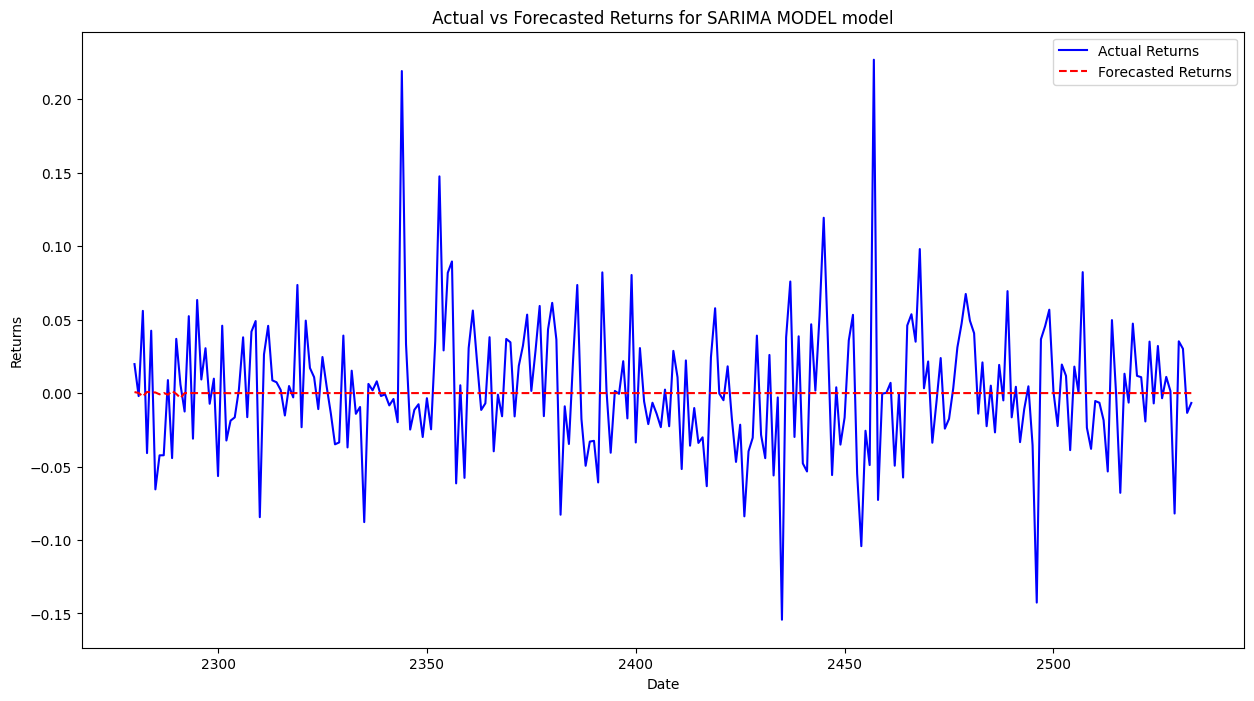

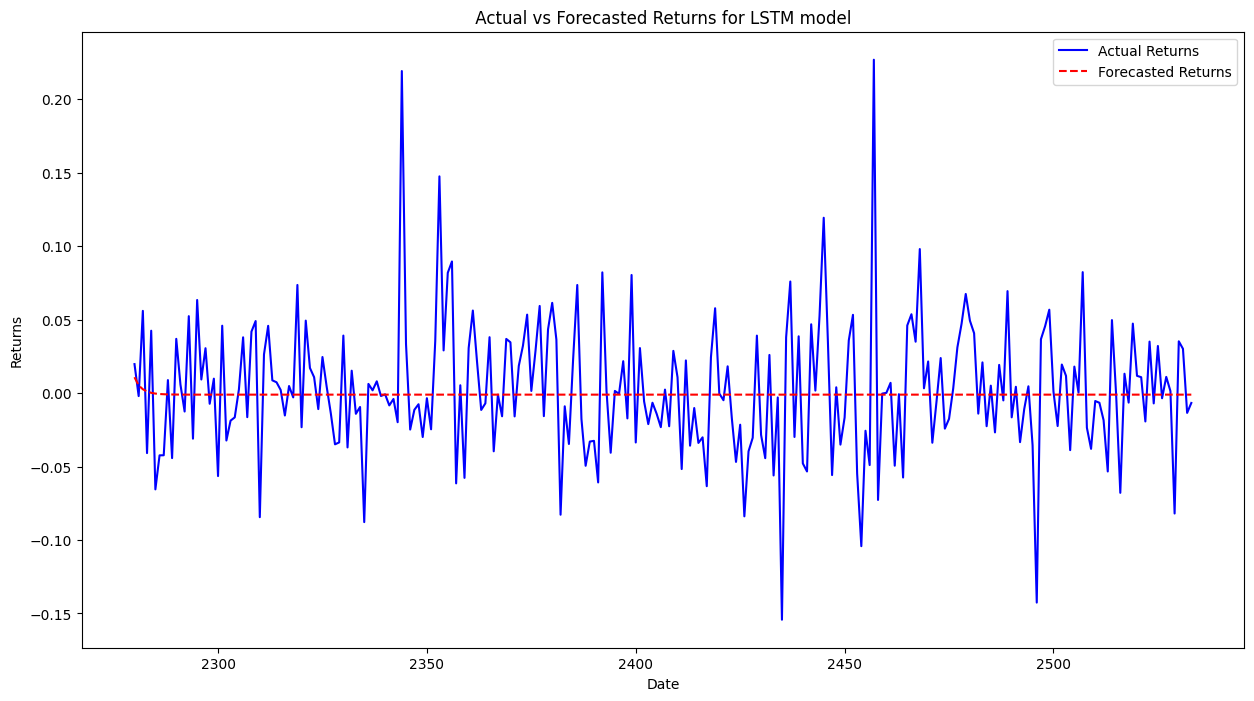

In [ ]:
# Plot actual vs forecast returns
plt.figure(figsize=(15, 8))
plt.plot(test_data.index, test_data["TSLA"], label='Actual Returns', color='blue')
plt.plot(test_data.index, s_forecast, label='Forecasted Returns', color='red', linestyle='--')
plt.title(" Actual vs Forecasted Returns for SARIMA MODEL model ")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.show()



# Plot actual vs forecast returns
plt.figure(figsize=(15, 8))
plt.plot(test_data.index, test_data["TSLA"], label='Actual Returns', color='blue')
plt.plot(test_data.index, test_predictions, label='Forecasted Returns', color='red', linestyle='--')
plt.title(" Actual vs Forecasted Returns for LSTM model ")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.show()

In [ ]:
# Model Performance Comparison: SARIMA vs. LSTM
# --------------------------------------------
# Evaluation Metrics on Test Data:
# SARIMA:
#   - Mean Absolute Error (MAE): 0.033095
#   - Root Mean Squared Error (RMSE): 0.045621
#   - Mean Absolute Percentage Error (MAPE): 1.003%
#
# LSTM:
#   - Mean Absolute Error (MAE): 0.033049
#   - Root Mean Squared Error (RMSE): 0.045651
#   - Mean Absolute Percentage Error (MAPE): 1.063%
#
# Discussion:
# Both models perform very similarly, but SARIMA slightly outperforms LSTM on RMSE and MAPE,
# which are important metrics for forecasting accuracy.
# SARIMA's strength lies in explicitly modeling seasonality and trends, making it well-suited
# for this dataset.
# LSTM, while flexible and capable of capturing nonlinear patterns, may require more data
# and tuning to surpass SARIMA's performance.
#
# Final choice:
# Based on the evaluation metrics and the nature of the data, SARIMA is the preferred model
# for forecasting in this case due to its slightly better accuracy and interpretability.


In [ ]:
# Save the LSTM model (after training)
l_model.save('LSTM_model.h5')

with open('SARIMA_model.pkl', 'wb') as pkl_file:
    pickle.dump(s_model_fit, pkl_file)

In [ ]:
from google.colab import files
files.download("LSTM_model.h5")
files.download("SARIMA_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_predictions_df = pd.DataFrame(test_predictions, columns=['Predicted_Return'])
test_predictions_df.to_csv("predicted_return_with_LSTM.csv", index=False)
s_forecast_df = pd.DataFrame(s_forecast, columns=['Predicted_Return'])
s_forecast_df.to_csv("predicted_return_with_SARIMA.csv", index=False)

In [ ]:
files.download("predicted_return_with_SARIMA.csv")
files.download("predicted_return_with_LSTM.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>